In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

import numpy as np
from scipy import integrate
import sympy
sympy.init_printing()

In [46]:
from matplotlib import animation

In [2]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)

ode1 = sympy.Eq((m1 + m2)*l1*theta1(t).diff(t,t) +
                m2*l2*theta2(t).diff(t,t)*sympy.cos(theta1(t) -theta2(t)) +
                m2*l2*theta2(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) + 
                g*(m1 + m2)*sympy.sin(theta1(t)))

C:\Users\MYHOME\anaconda3\lib\site-packages\sympy\core\relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [3]:
ode2 = sympy.Eq(m2*l2*theta2(t).diff(t,t) +
                m2*l1*theta1(t).diff(t,t)*sympy.cos(theta1(t) - theta2(t)) -
                m2*l1*theta1(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) +
                m2*g*sympy.sin(theta2(t)))

In [4]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)

varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

In [5]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

In [6]:
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [7]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}

f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [8]:
y0 = [2.0, 0, 0.0, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0,t[0])

In [9]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx+=1

In [12]:
theta1_np, theta2_np = y[:, 0], y[:, 2]


x1 =  params[l1] * np.sin(theta1_np)

y1 = -params[l1] * np.cos(theta1_np)

x2 = x1 + params[l2] * np.sin(theta2_np)

y2 = y1 - params[l2] * np.cos(theta2_np)
    

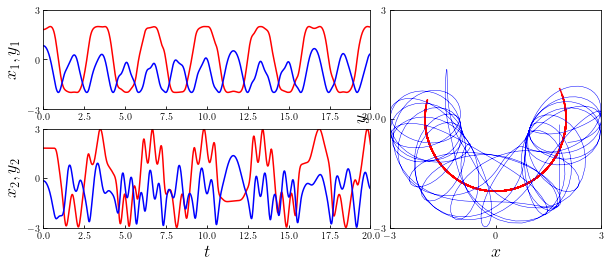

In [47]:
fig = plt.figure(figsize=(10, 4))

def init():
    line.set_data(([],[]))
    return (line,)

def animate(t):
    

    theta1_np, theta2_np = y[:, 0], y[:, 2]

    x1 =  params[l1] * np.sin(theta1_np)

    y1 = -params[l1] * np.cos(theta1_np)

    x2 = x1 + params[l2] * np.sin(theta2_np)

    y2 = y1 - params[l2] * np.cos(theta2_np)
    
    line.set_data(x1,x2,y1,y2)
    
    return(line,)


    
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)

ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)

ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')

ax1.plot(t, y1, 'b')

ax1.set_ylabel('$x_1, y_1$', fontsize=18)

ax1.set_yticks([-3, 0, 3])

ax1.set_xlim(0, 20)

ax1.set_ylim(-3, 3)

ax1.tick_params(which='both', direction='in')


ax2.plot(t, x2, 'r')

ax2.plot(t, y2, 'b')

ax2.set_xlabel('$t$', fontsize=18)

ax2.set_ylabel('$x_2, y_2$', fontsize=18)

ax2.set_yticks([-3, 0, 3])

ax2.set_xlim(0, 20)

ax2.set_ylim(-3, 3)

ax2.tick_params(which='both', direction='in')


ax3.plot(x1, y1, 'r')

ax3.plot(x2, y2, 'b', lw=0.5)

ax3.set_xlabel('$x$', fontsize=18)

ax3.set_ylabel('$y$', fontsize=18)

ax3.set_xticks([-3, 0, 3])

ax3.set_yticks([-3, 0, 3])

ax3.set_xlim(-3, 3)

ax3.set_ylim(-3, 3)

ax3.tick_params(which='both', direction='in')
line, = ax3.plot([],[])
    

    
    

    
ani = animation.FuncAnimation(fig=fig,func=animate, init_func=init,interval=20, blit=True)
plt.show()
